In [2]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import datetime
# auto reolad zewnetrznych skryptow bez resetowania notebooka
import sys
sys.path.append('..')
import models
from utils.modeling_utils import SequenceGeneratorCV

%reload_ext autoreload
%autoreload 2

DEVICE = "cpu"

# Data prep

In [3]:
df = pd.read_csv('../../data/csv/six_cities.csv')
df['dt'] = pd.to_datetime(df['dt'])

# tylko warszawa
# df = df[df['city'].isin(['Warszawa'])]
df = df.reset_index(drop=True)
#df.head()

In [4]:
# na podstawie 96 godzin predykcja na dwa nastepne dni
input_width, output_width = 96, 48

# one moga zostac bez problemu jako stala czy cos, maja rozklady bardzo nienormalne
normalize_features = ['humidity', 'clouds.all', 'rain.1h', 'snow.1h', 'co', 'no', 'no2', 'so2', 'pm2_5', 'pm10', 'nh3']

# zmienne numeryczne ktore chcemy wykorzystac w modelu
numeric_features = ['day_sin', 'day_cos', 'week_sin', 'week_cos', 'month_sin', 'month_cos', 'co', 'no']

# zmienne kategoryczne ktore chcemy wykorzystac w modelu
categorical_features = ['state']

# zmienne ktorych chcemy robic predykcje
output_columns = ['co', 'no']

seq_gen = SequenceGeneratorCV(
    numeric_features = numeric_features, 
    categorical_features = categorical_features,
    output_features = output_columns,
    normalize_features = normalize_features,
    device = DEVICE 
)
seq_gen.init_preprocessor(df[:10])

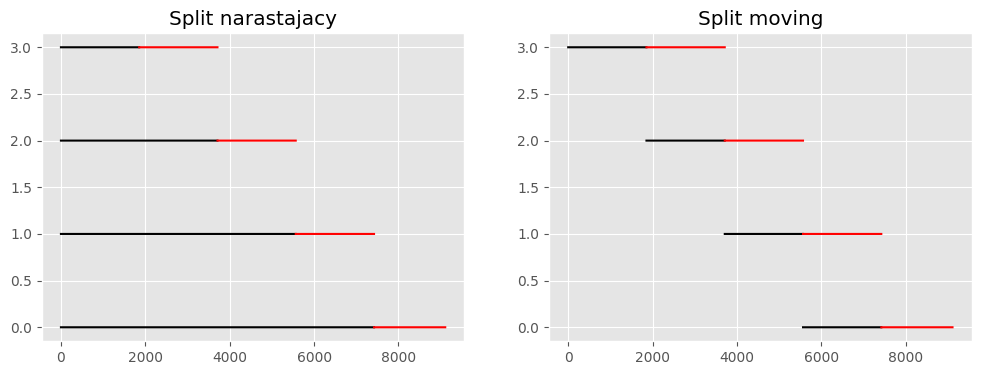

In [9]:
cities_dfs, cv_indices = seq_gen.split_data(df, 5, False)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
data = pd.DataFrame({'a': np.ones(9110)})
for idx, val in enumerate(reversed(cv_indices)):
    ax[0].plot(data.index[val[0]], idx*data['a'][val[0]], 'k')
    ax[0].plot(data.index[val[1]], idx*data['a'][val[1]], 'r')
    ax[0].set_title('Split narastajacy')

cities_dfs, cv_indices = seq_gen.split_data(df, 5, True)
for idx, val in enumerate(reversed(cv_indices)):
    ax[1].plot(data.index[val[0]], idx*data['a'][val[0]], 'k')
    ax[1].plot(data.index[val[1]], idx*data['a'][val[1]], 'r')
    ax[1].set_title('Split moving')